In [15]:
import pandas as pd
import seaborn as sns
import os

DATA_DIR = 'C:\\Users\\vncs_\\LT\\csv'

In [16]:
dfs = []
for file in os.listdir(DATA_DIR):
    filename = os.fsdecode(file)
    #Apenas os dados do estado de Sâo Paulo
    if filename.endswith(".csv") and filename.split(".")[0][2:-4] == 'SP':
        df = pd.read_csv(os.path.join(DATA_DIR, filename), index_col=None)
        dfs.append(df)
df = pd.concat(dfs, axis=0, ignore_index=True)

In [17]:
keep_columns = ['CNES', 'CODLEITO','QT_SUS','COMPETEN'] 
drop_columns = [column for column in list(df.columns) if column not in keep_columns]
df.drop(drop_columns, axis=1, inplace = True)

In [18]:
df['COMPETEN'] = df['COMPETEN'].apply(str) 
df['MONTH'] = df['COMPETEN'].str[-2:]
df['YEAR'] = df['COMPETEN'].str[:-2]

Para definir quais as UTI's que estão em uso foi utilizado a documentação do CNES dos códigos dos leitos.<br>
Os leitos 74,75,76 foram adicionados devido a [Portaria Nº 237, de 18 de Março de 2020](https://www.in.gov.br/web/dou/-/portaria-n-237-de-18-de-marco-de-2020-*-251908477)

In [19]:
icu_beds_type = [51,52,74,75,76,85,86]
df = df[df['CODLEITO'].isin(icu_beds_type)]
df.reset_index(inplace=True)

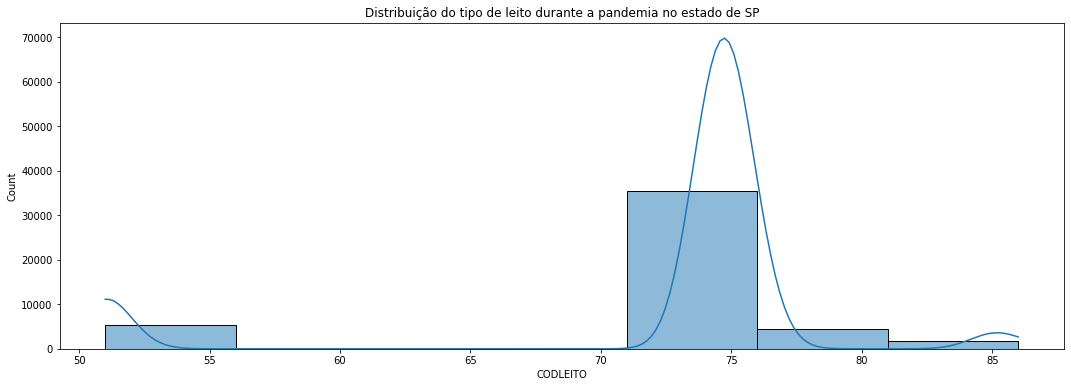

In [20]:
ax = sns.histplot(data=df, x="CODLEITO", kde=True, bins=7)
ax.set_title("Distribuição do tipo de leito durante a pandemia no estado de SP")
ax.figure.set_size_inches(18,6)

In [21]:
df = df.pivot_table('QT_SUS',['CNES', 'COMPETEN','MONTH','YEAR'],'CODLEITO')
df.reset_index(inplace=True)
df.fillna(0)

CODLEITO,CNES,COMPETEN,MONTH,YEAR,51,52,74,75,76,85,86
0,8028,201501,01,2015,0.0,0.0,0.0,12.0,0.0,0.0,0.0
1,8028,201502,02,2015,0.0,0.0,0.0,12.0,0.0,0.0,0.0
2,8028,201503,03,2015,0.0,0.0,0.0,12.0,0.0,0.0,0.0
3,8028,201504,04,2015,0.0,0.0,0.0,12.0,0.0,0.0,0.0
4,8028,201505,05,2015,0.0,0.0,0.0,12.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
38243,9997032,202105,05,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38244,9997032,202106,06,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38245,9997032,202107,07,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38246,9997032,202108,08,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df['TOTAL_ICU_BEDS'] = df[[51,52,74,75,76,85,86]].sum(axis=1)

In [23]:
df_8028 = df[(df['CNES'] == 8028) & (df['YEAR'] >= '2020' )]

<AxesSubplot:title={'center':'Quantidade de leitos no Hospital Municipal Antonio Giglio em Osasco a partir de 2020'}, xlabel='COMPETEN', ylabel='TOTAL_ICU_BEDS'>

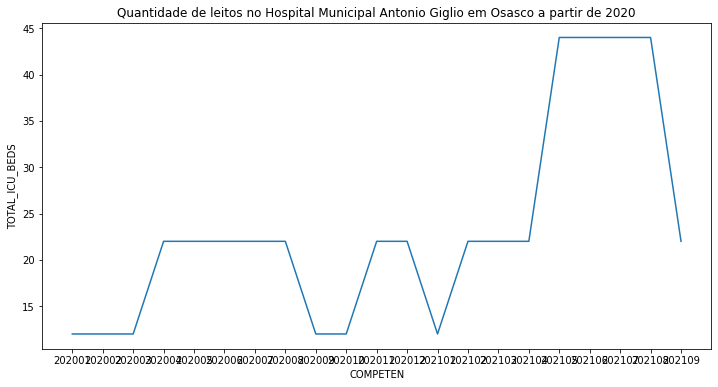

In [29]:
ax = sns.lineplot(data=df_8028, x="COMPETEN", y="TOTAL_ICU_BEDS")
ax.figure.set_size_inches(12,6)
ax.set_title("Quantidade de leitos no Hospital Municipal Antonio Giglio em Osasco a partir de 2020")
ax

In [25]:
df['TOTAL_ICU_BEDS'].idxmax(axis=0, skipna=True)

5666

In [26]:
df.loc[5666]['CNES']

2078015

In [27]:
df_cnes_2078015 = df[(df['CNES'] == 2078015)]
             

<AxesSubplot:title={'center':'Quantidade de leitos no Hospital das Clínicas da Faculdade de Medicina da Universidade de São Paulo desde 2015'}, xlabel='YEAR', ylabel='TOTAL_ICU_BEDS'>

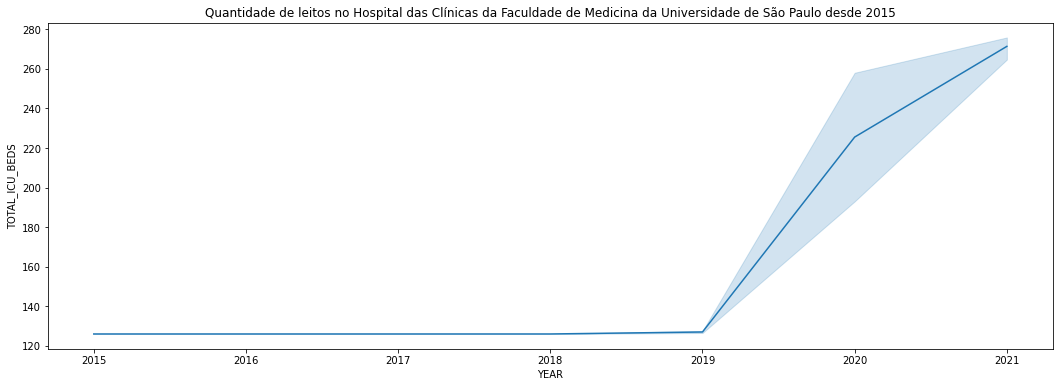

In [28]:
ax = sns.lineplot(data=df_cnes_2078015, x="YEAR", y="TOTAL_ICU_BEDS")
ax.set_title("Quantidade de leitos no Hospital das Clínicas da Faculdade de Medicina da Universidade de São Paulo desde 2015")
ax.figure.set_size_inches(18,6)
ax